In [15]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from scipy.special import gamma
from sympy import diff, symbols, integrate, Rational, solve, Pow, limit
from scipy.integrate import quad
from numpy.random import normal
from scipy.stats import beta, norm

In [16]:
k, p, n = 3, 1/2, 160

In [17]:
def comb(n, k):
    return math.factorial(k)/(math.factorial(k-n)*math.factorial(n))
Pk = [comb(j, k)*p**j*(1-p)**(k-j) for j in range(k+1)]
Uk = [sum(Pk[:i+1]) for i in range(len(Pk))]
print(Pk, Uk)

X = np.empty(n)
for i in range(n):
    p_val = np.random.rand()
    for j, value in enumerate(Uk):
        if p_val < value:
            X[i] = (j)
            break          
X = sorted(X)     
print(X)

[0.125, 0.375, 0.375, 0.125] [0.125, 0.5, 0.875, 1.0]
[np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64

In [18]:
alpha = 0.02
e_x = np.mean(X)
Kx = e_x * n
Beta1 = beta(a=np.sum(X), b=n*k - np.sum(X) + 1)
Beta2 = beta(a=np.sum(X)+1, b=n*k-np.sum(X))

p1 = Beta1.ppf(q=alpha/2)
p2 = Beta2.ppf(q=1-alpha/2)
print(p1, p2)

0.40491887671269117 0.5124474083043193


In [19]:
NormStd = norm(0, 1)
prl = e_x/k + NormStd.ppf(alpha/2)/(k*(n*k)**0.5)*(e_x*(k-e_x))**0.5
prr = e_x/k + NormStd.ppf(1 - alpha/2)/(k*(n*k)**0.5)*(e_x*(k-e_x))**0.5
print(prl, prr)

0.40542661594103535 0.5112400507256313


[np.float64(0.21073104576296547), np.float64(0.6409025383527246), np.float64(0.9336097857462361), np.float64(0.9999999999999999)]
[np.float64(0.11589492215578422), np.float64(0.4813327446959569), np.float64(0.8654301082353009), np.float64(1.0)]
[np.float64(0.15), np.float64(0.5625), np.float64(0.9125), np.float64(1.0)]


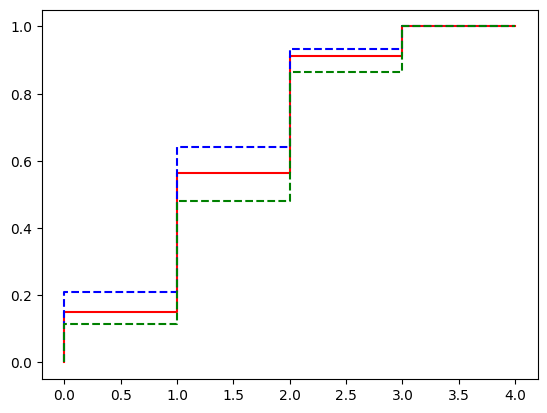

In [20]:
Pk1 = [comb(j, k)*p1**j*(1-p1)**(k-j) for j in range(k+1)]
Uk1 = [sum(Pk1[:i+1]) for i in range(len(Pk1))]
print(Uk1)

Pk2 = [comb(j, k) * p2 ** j * (1 - p2) ** (k - j) for j in range(k + 1)]
Uk2 = [sum(Pk2[:i + 1]) for i in range(len(Pk2))]
print(Uk2)

P, bars, _ = plt.hist(X, bins=k+1)
P = P/sum(P)
F = [sum(P[:i+1]) for i in range(k+1)]
print(F)
plt.close()
plt.step([i for i in range(k+2)], [0, *F], color="red")
plt.step([i for i in range(k+2)], [0, *Uk1], color="blue", linestyle="dashed")
plt.step([i for i in range(k+2)], [0, *Uk2], color="green", linestyle="dashed")

## ЦПТ
![Доверительный интервал](./5_1.png) <br>
![Доверительный интервал](./5_2.png) <br>
![Доверительный интервал](./5_3.png) <br>
![Доверительный интервал](./5_4.png) <br>


In [21]:
NormStd = norm(0, 1)
prl = e_x/k + NormStd.ppf(alpha/2)/(k*(n*k)**0.5)*(e_x*(k-e_x))**0.5
prr = e_x/k + NormStd.ppf(1 - alpha/2)/(k*(n*k)**0.5)*(e_x*(k-e_x))**0.5
print(prl, prr)

0.40542661594103535 0.5112400507256313


[np.float64(0.21019210166885294), np.float64(0.6401683237562814), np.float64(0.9333597267517597), np.float64(1.0)]
[np.float64(0.11675805001239893), np.float64(0.4831427640192526), np.float64(0.8663790337914546), np.float64(1.0)]
[np.float64(0.15), np.float64(0.5625), np.float64(0.9125), np.float64(1.0)]


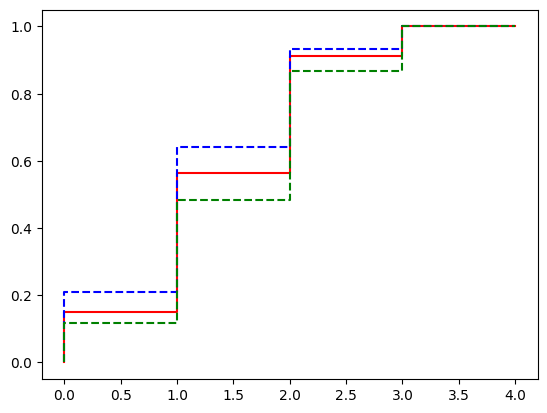

In [22]:
Pk1 = [comb(j, k)*prl**j*(1-prl)**(k-j) for j in range(k+1)]
Uk1 = [sum(Pk1[:i+1]) for i in range(len(Pk1))]
print(Uk1)

Pk2 = [comb(j, k) * prr ** j * (1 - prr) ** (k - j) for j in range(k + 1)]
Uk2 = [sum(Pk2[:i + 1]) for i in range(len(Pk2))]
print(Uk2)

P, bars, _ = plt.hist(X, bins=k+1)
P = P/sum(P)
F = [sum(P[:i+1]) for i in range(k+1)]
print(F)
plt.close()
plt.step([i for i in range(k+2)], [0, *F], color="red")
plt.step([i for i in range(k+2)], [0, *Uk1], color="blue", linestyle="dashed")
plt.step([i for i in range(k+2)], [0, *Uk2], color="green", linestyle="dashed")